11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8576 - loss: 0.4891
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9533 - loss: 0.1576
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9683 - loss: 0.1064
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9777 - loss: 0.0730
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0894
Test accuracy: 0.9761999845504761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


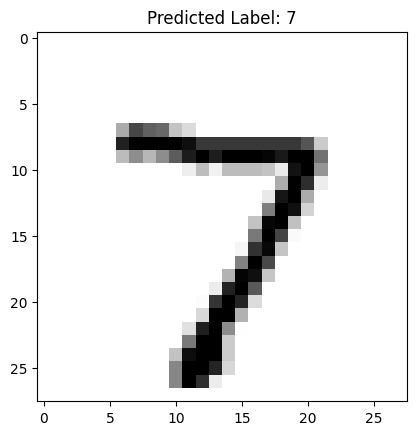

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


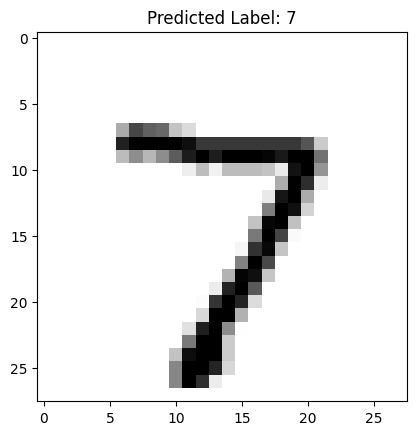

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


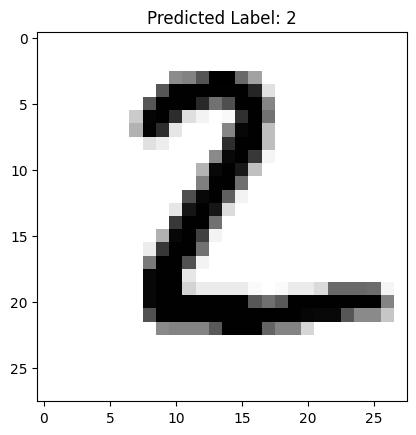

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


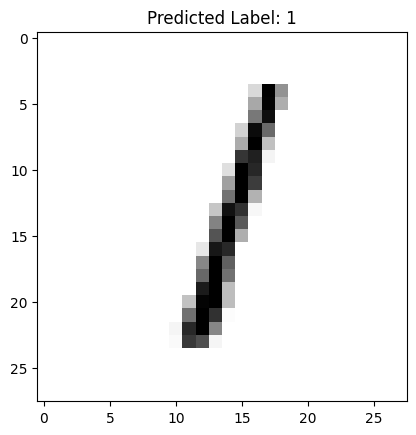

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


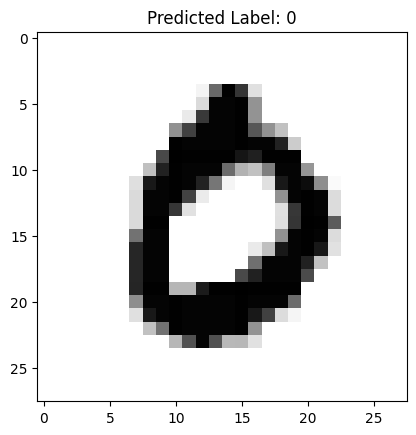

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


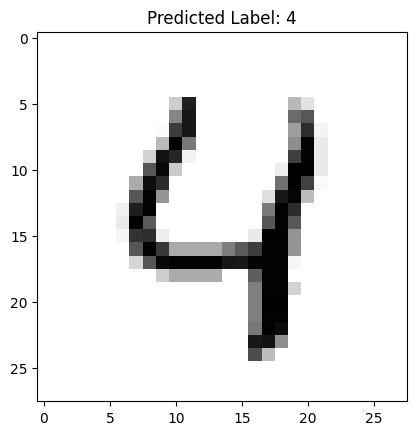

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load the MNIST Dataset
# The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits.
# Each image is 28x28 pixels, and the labels are integers from 0 to 9.

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Step 2: Preprocess the data
# Normalize the images to values between 0 and 1 by dividing by 255.
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 3: Build the Neural Network Model
# The model will have one hidden layer with 128 neurons and an output layer for digit classification (0-9).

model = models.Sequential([
    # Flatten the 28x28 images into a 1D array of 784 elements (28 * 28)
    layers.Flatten(input_shape=(28, 28)),

    # First dense layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Dropout layer to reduce overfitting by randomly setting input units to 0 during training
    layers.Dropout(0.2),

    # Output layer with 10 neurons for the digits 0-9, softmax activation gives probabilities for each digit
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the Model
# Use 'adam' optimizer and sparse categorical cross-entropy loss for multi-class classification.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
# Train the model using the training data for 5 epochs
model.fit(train_images, train_labels, epochs=5)

# Step 6: Evaluate the Model
# Evaluate the model's performance on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")

# Step 7: Make Predictions
# Predict the label of the first test image
predicted_label = model.predict(test_images[0].reshape(1, 28, 28))

# Show the image and the predicted label
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f"Predicted Label: {predicted_label.argmax()}")
plt.show()

# Optionally, you can test predictions for other images
# For example, let's display predictions for the first 5 test images:
for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted Label: {model.predict(test_images[i].reshape(1, 28, 28)).argmax()}")
    plt.show()
